In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [28]:
#1 Leia o arquivo X.npy

# Carregar dados
X = np.load("X.npy")

# Imprime a forma da matriz
print(np.shape(X))

(3023, 1850)


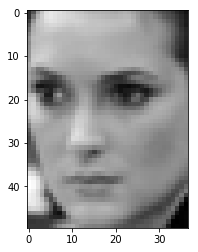

In [29]:
#2 Imprima a imagem da primeira pessoa.

# Reshape a primeira matriz
firstPerson = X[0].reshape((50, 37))

# Imprimindo primeiro rosto
plt.imshow(firstPerson, cmap="gray")
plt.show()

In [30]:
#3 Faça a fatoração svd da matriz X.

# Primeira formulação
u1, s1, vh1 = np.linalg.svd(X, full_matrices=True)

print("SVD with full matrices:")
print('U: ', np.shape(u1))
print('D: ', np.shape(np.diag(s1)))
print('V: ', np.shape(vh1))

# Segunda formulação
u2, s2, vh2 = np.linalg.svd(X, full_matrices=False)

print("SVD without full matrices:")
print('U: ', np.shape(u2))
print('D: ', np.shape(np.diag(s2)))
print('V: ', np.shape(vh2))

SVD with full matrices:
U:  (3023, 3023)
D:  (1850, 1850)
V:  (1850, 1850)
SVD without full matrices:
U:  (3023, 1850)
D:  (1850, 1850)
V:  (1850, 1850)


In [31]:
#4 Verifique a 2a formulação

# Calcula o produto do SVD
c = np.dot(np.dot(u2, d), vh2)

# Calcula o erro
error = X - c

# Calcula erro máximo na matriz
maxError = np.amax(abs(error))

# Calcula a média dos dados na matriz
meanData = np.sum(abs(X))/np.size(X)

print('Max erro: ', maxError)
print('Media data:', meanData)

Max erro:  0.00047302246
Media data: 129.54883765008807


In [32]:
#5 Compute a matriz reduzida e a matriz reconstruída

# 5.1 matriz reduzida
XD =  np.dot(u2[:, 0:150], d[0:150, 0:150])

# 5.2 matriz reconstruída
XC =  np.dot(np.dot(u2[:, 0:150], d[0:150, 0:150]), vh2[0:150, :])

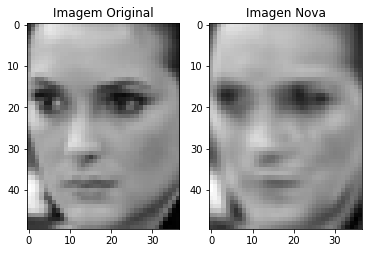

In [33]:
#6 Imprima a imagem reconstruída da 1a pessoa redução

# Get the first face from the new matrix
firstPersonC = XC[0].reshape((50, 37))

fig = plt.figure()

# Imprime primeira face da matriz original
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(firstPerson,cmap="gray")
a.set_title('Imagem Original')

# Imprime primeira face da nova matriz
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(firstPersonC,cmap="gray")
a.set_title('Imagen Nova')

plt.show()

(3023, 150)
(150, 1850)


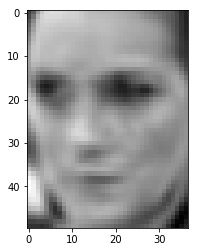

In [34]:
#7 Use o TruncatedSVD do scikit-learn

tsvd = TruncatedSVD(n_components=150)
T_u_sigma = tsvd.fit_transform(X)
T_Sigma = tsvd.singular_values_
T_vth = tsvd.components_
T_d = np.diag(T_Sigma)
T_u = np.dot(T_u_sigma,np.linalg.inv(T_d))

print(np.shape(T_u_sigma))
print(np.shape(T_vth))

# Cria matriz reduzida com o TruncatedSVD
T_XD = np.dot(T_u,T_d)

# Cria matriz reconstruida com o TruncatedSVD
T_XC = np.dot(np.dot(T_u,T_d),T_vth)


firstPersonT_C = T_XC[0].reshape((50, 37))

plt.imshow(firstPersonT_C,cmap="gray")

plt.show()

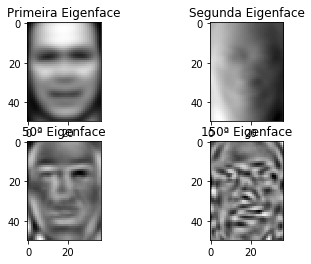

In [35]:
#8 Imprima as imagens das eigenfaces

fig = plt.figure()

#  Primeira Eigenface
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(T_vth[0].reshape((50, 37)), cmap="gray")
a.set_title('Primeira Eigenface')

# Segunda Eigenface
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(T_vth[1].reshape((50, 37)), cmap="gray")
a.set_title('Segunda Eigenface')

# 50ª Eigenface
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(T_vth[49].reshape((50, 37)), cmap="gray")
a.set_title('50ª Eigenface')

# 150ª Eigenface
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(T_vth[149].reshape((50, 37)), cmap="gray")
a.set_title('150ª Eigenface')


#Show Image
plt.show()